Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd


In [3]:
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

 Data collection

In [4]:
loan= pd.read_csv("loan.csv")

Data preprocessing

In [5]:
print(loan)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [6]:
type(loan)

pandas.core.frame.DataFrame

In [7]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
loan.shape

(614, 13)

In [9]:
loan.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
loan=loan.dropna()

In [12]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
loan.replace({"Loan_Status":{"N":0,'Y':1}},inplace=True)

In [14]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [15]:
loan['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [16]:
loan=loan.replace(to_replace='3+',value=4)

In [17]:
loan['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

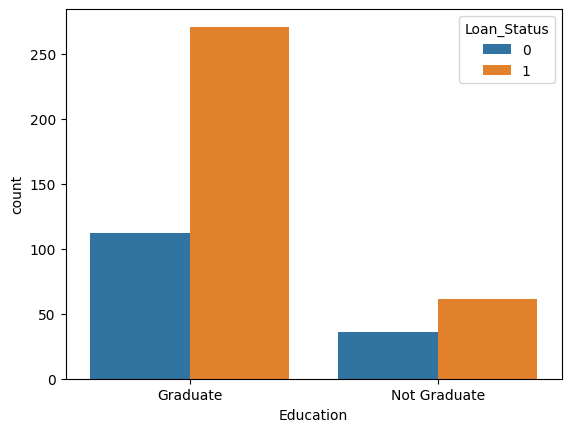

In [18]:
sns.countplot(x='Education',hue='Loan_Status',data=loan)

<Axes: xlabel='Married', ylabel='count'>

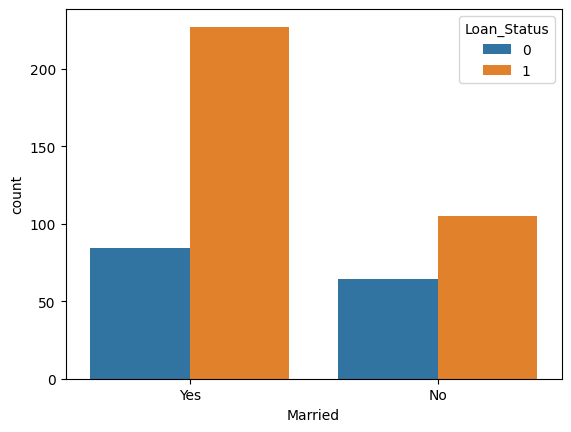

In [19]:
sns.countplot(x='Married',hue='Loan_Status',data=loan)

In [20]:
loan.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [21]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


performance parameters

In [22]:
X=loan.drop(columns=['Loan_ID','Loan_Status'])
Y=loan['Loan_Status']

In [23]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Apply linear regression, logistic regression, decision tree and random forest

In [24]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


In [26]:
model = LinearRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(Y_test, predictions)
print(mse)


0.14525850868048049


In [27]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
forest_pred = random_forest.predict(X_test)
test_data_accurace1 = accuracy_score(forest_pred,Y_test)

In [28]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, Y_train)
logistic_pred = logistic_reg.predict(X_test)
test_data_accurace2 = accuracy_score(logistic_pred,Y_test)

In [29]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
tree_pred = decision_tree.predict(X_test)
test_data_accurace3 = accuracy_score(tree_pred,Y_test)

comparative analysis

In [30]:
print("Logistic Regression:")
print(classification_report(Y_test, logistic_pred))

print("Decision Tree:")
print(classification_report(Y_test, tree_pred))

print("Random Forest:")
print(classification_report(Y_test, forest_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.84      0.94      0.89        33

    accuracy                           0.83        48
   macro avg       0.83      0.77      0.79        48
weighted avg       0.83      0.83      0.83        48

Decision Tree:
              precision    recall  f1-score   support

           0       0.58      0.47      0.52        15
           1       0.78      0.85      0.81        33

    accuracy                           0.73        48
   macro avg       0.68      0.66      0.67        48
weighted avg       0.72      0.73      0.72        48

Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.84      0.94      0.89        33

    accuracy                           0.83        48
   macro avg       0.83      0.77      0.79        48
weighted avg       0.83

C:\Users\aman\AppData\Local\Temp\ipykernel_3920\1363224327.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


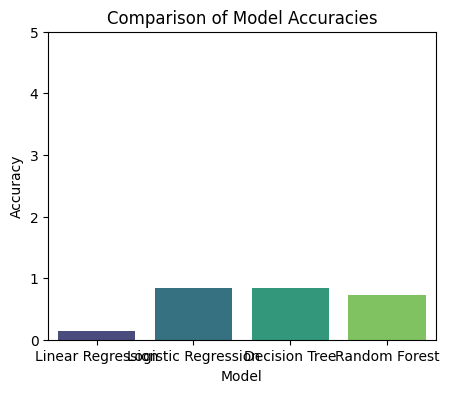

In [34]:
model_names = ['Linear Regression','Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [mse,test_data_accurace1, test_data_accurace2, test_data_accurace3]  

plt.figure(figsize=(5, 4))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 5)  
plt.xticks(rotation=0)
plt.show()